In [14]:
using Plots

In [1]:
function naive_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

naive_multiplication (generic function with 1 method)

In [2]:
function better_multiplication( A,B )
    C=zeros(Float64,size(A,1),size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    return(C)
end

better_multiplication (generic function with 1 method)

In [5]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
naive_multiplication(Asmall, Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall*Bsmall
A=rand(1000,1000);
B=rand(1000,1000);

In [6]:
@elapsed naive_multiplication(A, B)

4.067457027

In [8]:
@elapsed better_multiplication(A, B)

1.942180543

In [9]:
@elapsed A * B

0.127368656

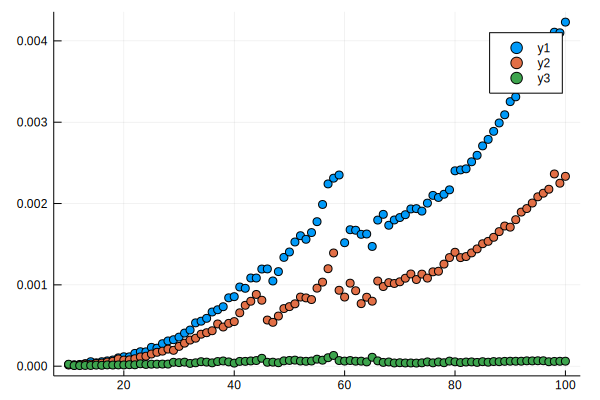

In [19]:
naive = []
better = []
blas = []
range = 10:100
for size = range
    m1 = rand(size, size)
    m2 = rand(size, size)
    push!(naive, @elapsed naive_multiplication(m1, m2))
    push!(better, @elapsed better_multiplication(m1, m2))
    push!(blas, @elapsed m1 * m2)
end

scatter(range, [naive, better, blas])